In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
import mnist
xtrain, xtest, ytrain, ytest = mnist.train_images(), mnist.test_images(), mnist.train_labels(), mnist.test_labels()

In [3]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
def normalization(data):
 return (data/255)

In [5]:
#Normalization
xtrain=normalization(xtrain)
xtest=normalization(xtest)


In [6]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

2024-03-12 10:36:48.259659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 10:36:48.259793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 10:36:48.552201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential
cnn = Sequential([
Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1)),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'),
MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.2),
Flatten(),
Dense(units=128, activation='relu'),
Dense(units=10, activation='softmax'),
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy

cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(),
            metrics=["acc"])

history = cnn.fit(xtrain, ytrain, epochs=9, batch_size=256, validation_data=(xtest, ytest))

Epoch 1/9
 22/235 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.4310 - loss: 1.8287

I0000 00:00:1710239834.901350      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710239834.917156      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.8024 - loss: 0.6629

W0000 00:00:1710239840.072754      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710239840.797989      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - acc: 0.8029 - loss: 0.6614 - val_acc: 0.9735 - val_loss: 0.0830
Epoch 2/9
 21/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9674 - loss: 0.1022

W0000 00:00:1710239841.674724      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9705 - loss: 0.0937 - val_acc: 0.9839 - val_loss: 0.0475
Epoch 3/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9805 - loss: 0.0617 - val_acc: 0.9876 - val_loss: 0.0365
Epoch 4/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9835 - loss: 0.0516 - val_acc: 0.9886 - val_loss: 0.0336
Epoch 5/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9880 - loss: 0.0402 - val_acc: 0.9890 - val_loss: 0.0277
Epoch 6/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9893 - loss: 0.0337 - val_acc: 0.9917 - val_loss: 0.0261
Epoch 7/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9915 - loss: 0.0277 - val_acc: 0.9897 - val_loss: 0.0270
Epoch 8/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9918 - loss: 0.0249 - val_acc: 0.9913 - val_loss: 0.0255
Epoch 9/9
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9920 - loss: 0.0232 - val_acc: 0.9900 - val_loss: 0.0275


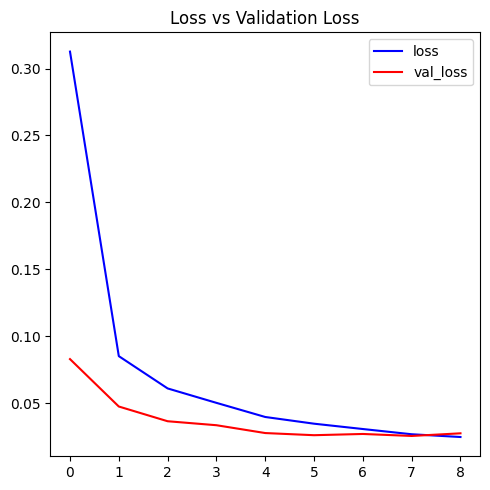

In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], color='blue', label='loss');
plt.plot(history.history['val_loss'], color='red', label='val_loss');
plt.legend();
plt.title('Loss vs Validation Loss');
plt.tight_layout()